In [1758]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import random
import pandas as pd
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
%matplotlib inline
from itertools import product
from matplotlib.lines import Line2D


from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.base import is_classifier

In [1759]:
def plot_confusion_matrix(
    y_true,
    y_pred,
    labels=None,
    sample_weight=None,
    normalize=None,
    display_labels=None,
    include_values=True,
    xticks_rotation="horizontal",
    values_format=None,
    cmap='Blues',
    ax=None,
    colorbar=True,
):


    cm = confusion_matrix(
        y_true, y_pred, sample_weight=sample_weight, labels=labels, normalize=normalize
    )

    if display_labels is None:
        if labels is None:
            display_labels = unique_labels(y_true, y_pred)
        else:
            display_labels = labels

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    return disp.plot(
        include_values=include_values,
        cmap=cmap,
        ax=ax,
        xticks_rotation=xticks_rotation,
        values_format=values_format,
        colorbar=colorbar,
)

In [1760]:
df = pd.read_csv('Team10/Dataset-1/train.csv')
data = []
target = []
for index, row in df.iterrows():
    data.append([row['x1'],row['x2']])
    target.append(row['label'])# Convert the Series to a list and append it to 'data'
    
df = pd.read_csv('Team10/Dataset-1/test.csv')
data_test = []
target_test = []
for index, row in df.iterrows():
    data_test.append([row['x1'],row['x2']])
    target_test.append(row['label'])
    
df = pd.read_csv('Team10/Dataset-1/val.csv')   
data_valid=[]
target_valid=[]
for index, row in df.iterrows():
    data_valid.append([row['x1'],row['x2']])
    target_valid.append(row['label'])

In [1761]:
# df = pd.read_csv('Team10/Dataset-2/Train.csv')
# data = []
# target = []
# for index, row in df.iterrows():
#     data.append([row['x1'],row['x2']])
#     target.append(row['label'])# Convert the Series to a list and append it to 'data'
    
# df = pd.read_csv('Team10/Dataset-2/Test.csv')
# data_test = []
# target_test = []
# for index, row in df.iterrows():
#     data_test.append([row['x1'],row['x2']])
#     target_test.append(row['label'])
    
# df = pd.read_csv('Team10/Dataset-2/Val.csv')   
# data_valid=[]
# target_valid=[]
# for index, row in df.iterrows():
#     data_valid.append([row['x1'],row['x2']])
#     target_valid.append(row['label'])

In [1762]:
def dist(xi,x):
    d = len(xi)
    sum = 0.0
    for i in range(d):
        sum = sum + ((xi[i]-x[i])**2)
    return sum

In [1763]:
def calculate_mean(vectors):
    n =len(vectors)
    d = len(vectors[0])
    sumvec = [0]*d
    for i in range(d):
        for j in range(n):
            sumvec[i] += vectors[j][i]
    for i in range(d):
        sumvec[i] = sumvec[i]/n
    return sumvec

In [1764]:
def findmaxlabel(Knn,target,data):
    frequency = {}
    for tup in Knn:
        if target[tup[1]] in frequency:
            frequency[target[tup[1]]]+=1
        else:
            frequency[target[tup[1]]]=1
    max_freq = 0
    for freq in frequency.values():
        if freq > max_freq:
            max_freq = freq
            
    competingLabel = []
    for label, freq in frequency.items():
        if freq == max_freq:
            competingLabel.append(label)
    if len(competingLabel)==1:
        return competingLabel[0]
    else:
        averagex=[]
        i=0
        for label in competingLabel:
            allx=[]
            for tup in Knn:
                if label==target[tup[1]]:
                    allx.append(data[tup[1]])
            
            averagex.append((calculate_mean(allx),i))
            i=i+1
        averagex.sort()
        return competingLabel[averagex[0][1]]

In [1765]:
def calculate_label(x,K,data,target):
    dist_label = []
    N = len(data)
    for i in range(N):
        newtup = (dist(data[i],x),i)
        dist_label.append(newtup)
    dist_label.sort()
    Knn = []
    for i in range(K):
        Knn.append(dist_label[i])
    label = findmaxlabel(Knn,target,data)
    return label

    

In [1766]:
def KNN(K,data,target,data_find):
    actual_find = []
    for x in data_find:
        label = calculate_label(x,K,data,target)
        actual_find.append(label)
    # print(actual_valid)
    return actual_find

In [1767]:
def numofmatches(act,exp):
    matches=0
    for i in range(len(act)):
        if act[i]==exp[i]:
            matches+=1
    return matches

In [1768]:
def accuracy(act,exp):
    perc = numofmatches(act,exp)
    perc = perc/(len(act))
    perc=perc*100
    return perc

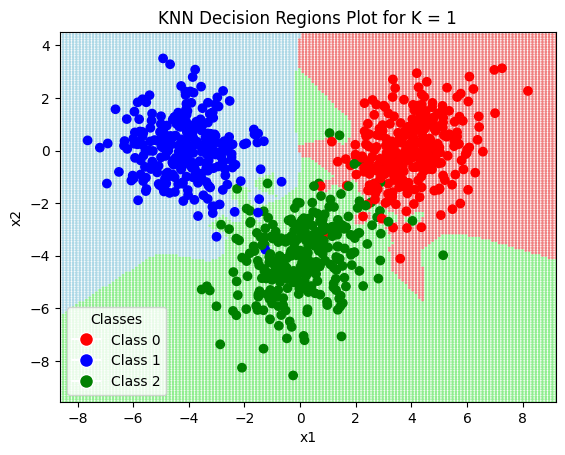

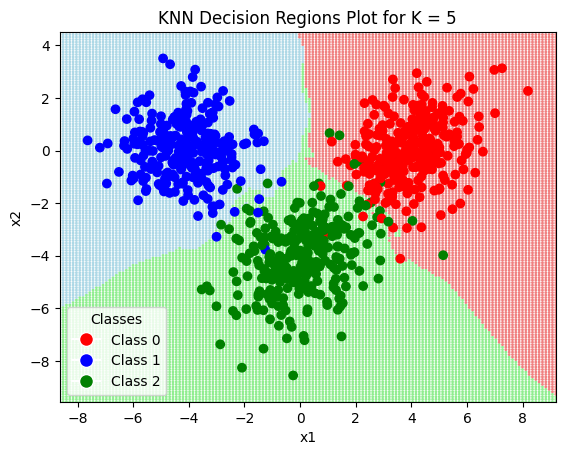

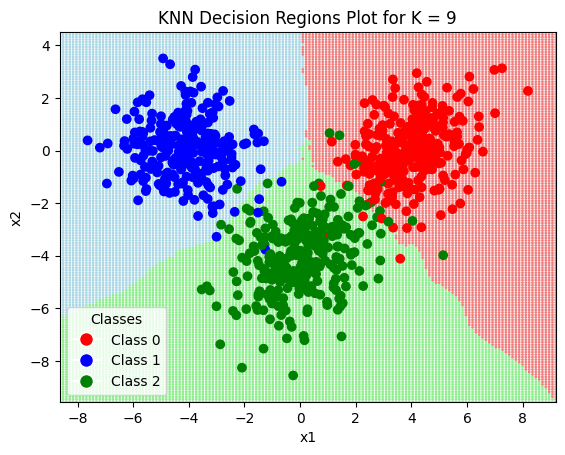

[[37, 0, 0], [0, 41, 0], [1, 2, 39]]
[[271, 0, 9], [0, 263, 3], [7, 6, 281]]
accuracy is 97.5 for test data for bestk = 5
accuracy is 97.02380952380952 for training data for bestk = 5


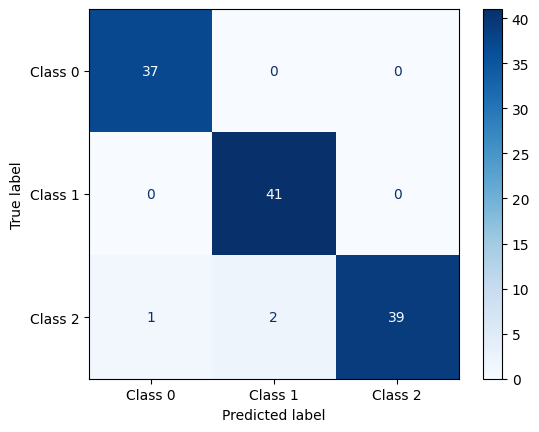

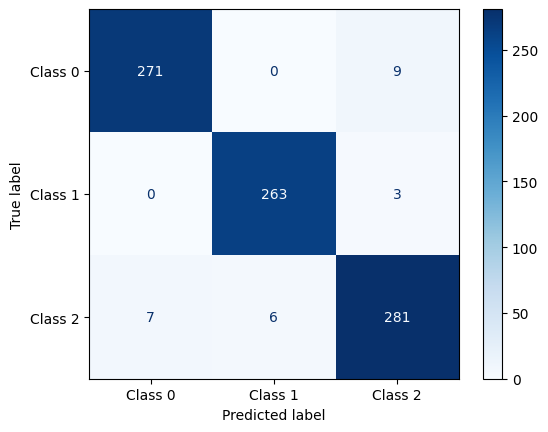

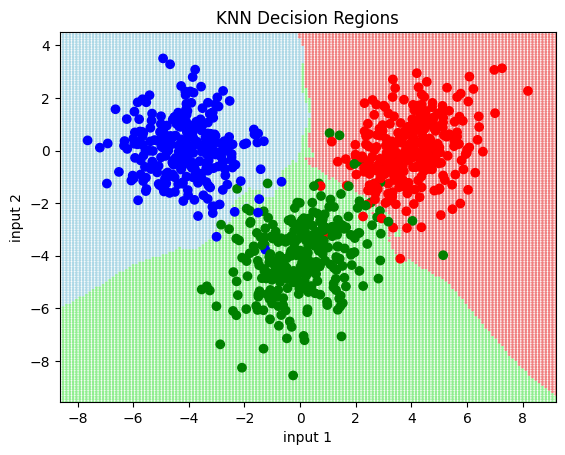

In [1769]:

allK = [1,5,9]

N = len(data)
bestk = 9
maxaccu=0
allaccutrain=[]
allaccutest=[]
allaccuvalid=[]

input1=[]
input2=[]
for i in range(len(data)):
    input1.append(data[i][0])
    input2.append(data[i][1])
# print(len(input1))
# print(len(input2))
    
x_min, x_max = min(input1) -1, max(input1) +1
y_min, y_max = min(input2) -1, max(input2) +1
x_points = np.linspace(x_min, x_max, 150)
y_points = np.linspace(y_min, y_max, 150)

# Create the meshgrid
xx, yy = np.meshgrid(x_points, y_points)


# Flatten the mesh grid for easy iteration
mesh_points = np.c_[xx.ravel(), yy.ravel()]

for K in allK:
    actual = KNN(K,data,target,data)
    actual_valid = KNN(K,data,target,data_valid)
    actual_test = KNN(K,data,target,data_test)
    accu = accuracy(actual,target)
    accu_valid = accuracy(actual_valid,target_valid)
    accu_test = accuracy(actual_test,target_test)
    allaccutrain.append(accu)
    allaccutest.append(accu_test)
    allaccuvalid.append(accu_valid)
    if accu_valid>maxaccu:
        maxaccu=accu
        bestk=K
    
    Z = np.array([calculate_label([x,y],K,data,target) for x, y in mesh_points])
    Z = Z.reshape(xx.shape)

    # Plotting the decision regions
    cmap_light = ListedColormap(['lightcoral', 'lightblue','lightgreen'])  # Light colors for decision regions
    cmap_bold = ListedColormap(['red', 'blue','green'])    # Bold colors for data points
    

    plt.scatter(xx, yy, c=Z, cmap=cmap_light,s=1)  # Plot decision regions

    # Scatter plot for the original points
    plt.scatter(input1, input2, c=target, cmap=cmap_bold)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"KNN Decision Regions Plot for K = {K}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    class_labels = ['Class 0', 'Class 1', 'Class 2']
    class_colors = ['red', 'blue', 'green']

    # Creating custom legend handles for each class
    handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
            for label, color in zip(class_labels, class_colors)]

    plt.legend(handles=handles, title="Classes")
    plt.show()
#     class1=[]
#     class2=[]
#     for i in range(len(actual_valid)):
#         if actual_valid[i]==0:
#             class1.append(i)
#         else:
#             class2.append(i)
#     input11=[]
#     input21=[]
#     input12=[]
#     input22=[]
#     for i in class1:
#         input11.append(data_valid[i][0])
#         input21.append(data_valid[i][1])
#     for i in class2:
#         input12.append(data_valid[i][0])
#         input22.append(data_valid[i][1])

        
#     plt.scatter(input11, input21, color='red', label='Class_Label=0')
#     plt.scatter(input12, input22, color='blue', label='Class_Label=1')
#     plt.xlabel('input1')
#     plt.ylabel('input2')
#     plt.legend()
#     plt.title('Classification')
#     plt.show()
# # print(actual_valid)
# print(f"for best K {bestk}")


dict = {'K':allK,'Training accuracy':allaccutrain,'Validation accuracy':allaccuvalid,'Test accuracy':allaccutest}
df2 = pd.DataFrame(dict)
df2.to_csv('report.csv')


bestk = 5
conf_matrix_train = [[0 for _ in range(3)] for _ in range(3)]
for i in range(len(data)):
    predlab = int(calculate_label(data[i],bestk,data,target))
    conf_matrix_train[predlab][int(target[i])] = conf_matrix_train[predlab][int(target[i])]+1
    
conf_matrix_test = [[0 for _ in range(3)] for _ in range(3)]
for i in range(len(data_test)):
    predlab = int(calculate_label(data_test[i],bestk,data,target))
    conf_matrix_test[predlab][int(target_test[i])] = conf_matrix_test[predlab][int(target_test[i])]+1
    
    
labelname = ["Class 0","Class 1","Class 2"]
dict = {' ':labelname,'Class 0':[x[0] for x in conf_matrix_test],'Class 1':[x[1] for x in conf_matrix_test],'Class 2':[x[2] for x in conf_matrix_test]}
df2 = pd.DataFrame(dict)
df2.to_csv('report.csv', mode='a',  index=False)

dict = {' ':labelname,'Class 0':[x[0] for x in conf_matrix_train],'Class 1':[x[1] for x in conf_matrix_train],'Class 2':[x[2] for x in conf_matrix_train]}
df2 = pd.DataFrame(dict)
df2.to_csv('report.csv', mode='a',  index=False)

print(conf_matrix_test)
print(conf_matrix_train)

K=bestk
actual_test = KNN(bestk,data,target,data_test)
accu_test = accuracy(actual_test,target_test)
print(f"accuracy is {accu_test} for test data for bestk = {bestk}")
actual = KNN(bestk,data,target,data)
accu = accuracy(actual,target)
print(f"accuracy is {accu} for training data for bestk = {bestk}")



display = plot_confusion_matrix(actual_test, target_test,display_labels=["Class 0","Class 1","Class 2"])
display2 = plot_confusion_matrix(actual, target,display_labels=["Class 0","Class 1","Class 2"])
plt.show()
input1=[]
input2=[]
for i in range(len(data)):
    input1.append(data[i][0])
    input2.append(data[i][1])
# print(len(input1))
# print(len(input2))
    
x_min, x_max = min(input1) -1, max(input1) +1
y_min, y_max = min(input2) -1, max(input2) +1
x_points = np.linspace(x_min, x_max, 150)
y_points = np.linspace(y_min, y_max, 150)

# Create the meshgrid
xx, yy = np.meshgrid(x_points, y_points)


# Flatten the mesh grid for easy iteration
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Predict class labels for each point in the mesh grid using your custom KNN function
Z = np.array([calculate_label([x,y],K,data,target) for x, y in mesh_points])
Z = Z.reshape(xx.shape)

# Plotting the decision regions
cmap_light = ListedColormap(['lightcoral', 'lightblue','lightgreen'])  # Light colors for decision regions
cmap_bold = ListedColormap(['red', 'blue','green'])    # Bold colors for data points

plt.scatter(xx, yy, c=Z, cmap=cmap_light,s=1)  # Plot decision regions

# Scatter plot for the original points
plt.scatter(input1, input2, c=target, cmap=cmap_bold)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Decision Regions")
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.show()


In [1770]:
def mean(data):
    sum = [0]*(len(data[0]))
    for i in range(len(data[0])):
        for x in data:
            sum[i] = sum[i] + x[i]
    for i in range(len(sum)):
        sum[i] = sum[i]/(len(data))
    return sum

In [1771]:
def M_means(data,M):
    N = len(data)
    z = []
    for i in range(M):
        dd = []
        for j in range(N):
            dd.append(0)
        z.append(dd)
    
    mus = []
    for i in range(M):
        z[i][i] = 1
        mus.append(data[i])
    temp = z
    for n in range(N):
        mini = 0
        minival = float('inf')
        for i in range(M):
            veclen = dist(data[n],mus[i])
            if veclen<minival:
                mini = i
                minival = veclen
        for i in range(M):
            if i==mini:
                z[i][n]=1
            else:
                z[i][n]=0
    for i in range(M):
        clusterdata =[]
        for j in range(N):
            if z[i][j]==1:
                clusterdata.append(data[j])
        mus[i] = mean(clusterdata)
    
    while temp!=z:
        temp = z
        for n in range(len(data)):
            mini = 0
            minival = float('inf')
            for i in range(M):
                veclen = 0
                for j in range(len(data[n])):
                    veclen+=((data[n][j]-mus[i][j])**2)
                if veclen<minival:
                    mini = i
            for i in range(M):
                if i==mini:
                    z[i][n]=1
                else:
                    z[i][n]=0
        for i in range(M):
            clusterdata =[]
            for j in range(len(z[i])):
                if z[i][j]==1:
                    clusterdata.append(data[j])
            mus[i] = mean(clusterdata)
    return mus
        

In [1772]:
def find_label_KNNREP(x,muumat,K,target,data):
    target1 = []
    data1=[]
    
    l = len(muumat)
    M = len(muumat[0])
    for i in range(l):
        for j in range(M):
            distance = dist(x,muumat[i][j])
            target1.append(i)
            data1.append(muumat[i][j])
    label = calculate_label(x,K,data1,target1)
    return label
    

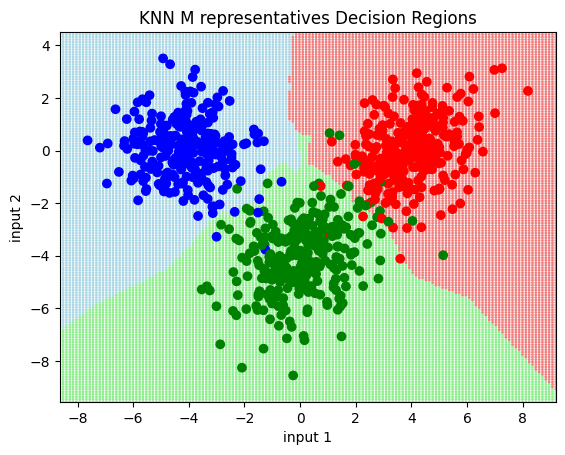

In [1773]:
allclass = list(set(target))
data_each_class = []
for i in range(len(allclass)):
    data_curr_class = []
    for j in range(len(data)):
        if target[j] == i:
            data_curr_class.append(data[j])
    data_each_class.append(data_curr_class)
K = 5
M = 10
muumat = []
for i in range(len(allclass)):
    muumat.append(M_means(data_each_class[i],M))

# result = []
# for x in data:
#     result.append(find_label_KNNREP(x,muumat,K,target,data))

# frac = numofmatches(result,target)
# num = len(result)
# print(f"{frac} number of labels matched out of {num}")
input1=[]
input2=[]
for i in range(len(data)):
    input1.append(data[i][0])
    input2.append(data[i][1])
# print(len(input1))
# print(len(input2))
    
x_min, x_max = min(input1) - 1, max(input1) + 1
y_min, y_max = min(input2) - 1, max(input2) + 1
x_points = np.linspace(x_min, x_max, 150)
y_points = np.linspace(y_min, y_max, 150)

# Create the meshgrid
xx, yy = np.meshgrid(x_points, y_points)

# Flatten the mesh grid for easy iteration
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Predict class labels for each point in the mesh grid using your custom KNN function
Z = np.array([find_label_KNNREP([x,y],muumat,K,target,data) for x, y in mesh_points])
Z = Z.reshape(xx.shape)
# print(Z)
# Plotting the decision regions
cmap_light = ListedColormap(['lightcoral', 'lightblue','lightgreen'])  # Light colors for decision regions
cmap_bold = ListedColormap(['red', 'blue','green'])    # Bold colors for data points

plt.scatter(xx, yy, c=Z, cmap=cmap_light,s=1)  # Plot decision regions

# Scatter plot for the original points
plt.scatter(input1, input2, c=target, cmap=cmap_bold)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN M representatives Decision Regions")
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.show()



In [1774]:
def find_cov_mat(data,mean):
    d = len(mean)
    result = [[0 for _ in range(d)] for _ in range(d)]
    for x in data:
        data1 = np.array(x)
        mean1 = np.array(mean)
        diff = data1 - mean1
        if diff.ndim == 1:
            diff = diff.reshape(-1, 1)
        
        mult = diff@np.transpose(diff)
        result = result + mult
        # print(result)
        # print("before division")
        
    for i in range(d):
        for j in range(d):
            result[i][j] = result[i][j]/(len(data))
    return result

In [1775]:
def find_normal(x,mymean,mycov):
    x1 = np.array(x)
    diff = x1-mymean
    if diff.ndim == 1:
        diff = diff.reshape(-1, 1)
    diff_trans = np.transpose(diff)
    cov_inverse = np.linalg.inv(mycov)
    # print(diff.shape)
    # print(cov_inverse.shape)
    # print(diff_trans.shape)
    mat = diff_trans@cov_inverse
    mat = mat@diff
    value = mat[0][0]/2
    value = -value
    expo = math.exp(value)
    twopi = 2*(math.pi)
    twopi = twopi**(len(x)/2)
    mycov_det = np.linalg.det(mycov)
    mycov_det = mycov_det**(0.5)
    result = expo/twopi
    result = result/mycov_det
    return result
    
    

In [1776]:
def find_bayes_label(x,allclass,data_each_class,allmean,prob_class,allcov):
    all_prob_Y_x = []
    for i in range(len(allclass)):
        normalprob = find_normal(x,allmean[i],allcov[i])
        prob_Yi_x = normalprob*prob_class[i]
        all_prob_Y_x.append(prob_Yi_x)
    maxi = 0
    for i in range(len(allclass)):
        if all_prob_Y_x[i]>all_prob_Y_x[maxi]:
            maxi = i
    return maxi

In [1777]:
def bayes(allclass,data_each_class,allmean,prob_class,allcov,data_find):
    result_label = []
    for x in data_find:
        result_label.append(find_bayes_label(x,allclass,data_each_class,allmean,prob_class,allcov))
    return result_label

accuracy is 97.02380952380952 for training data for different covariance matrices
accuracy is 95.83333333333334 for validation data for different covariance matrices
accuracy is 97.5 for test data for different covariance matrices


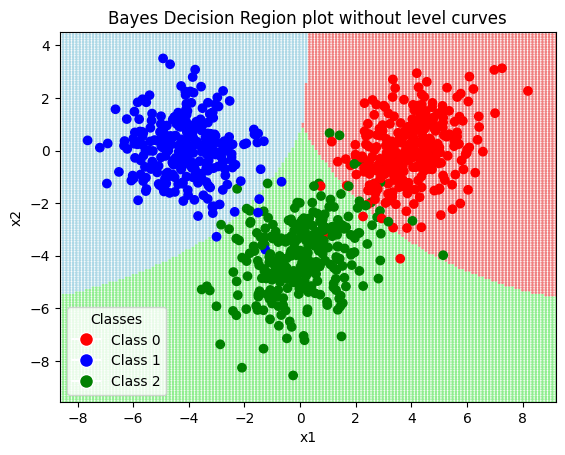

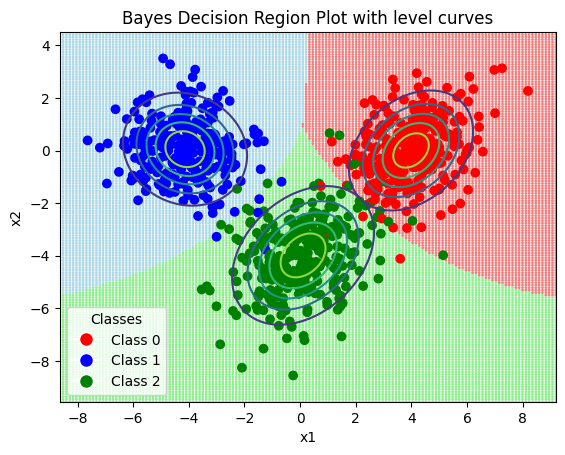

accuracy is 96.9047619047619 for training data for same covariance matrices
accuracy is 96.25 for validation data for same covariance matrices
accuracy is 96.66666666666667 for test data for same covariance matrices


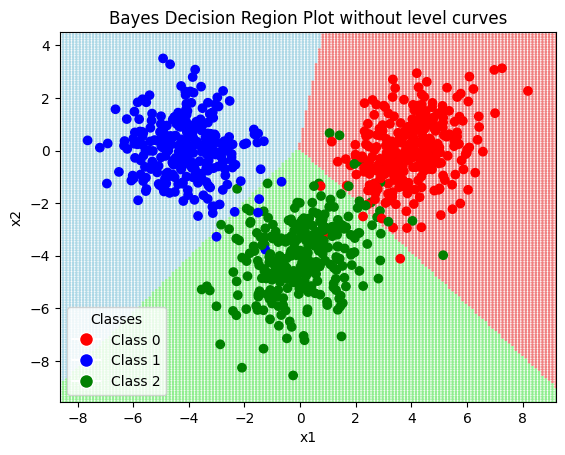

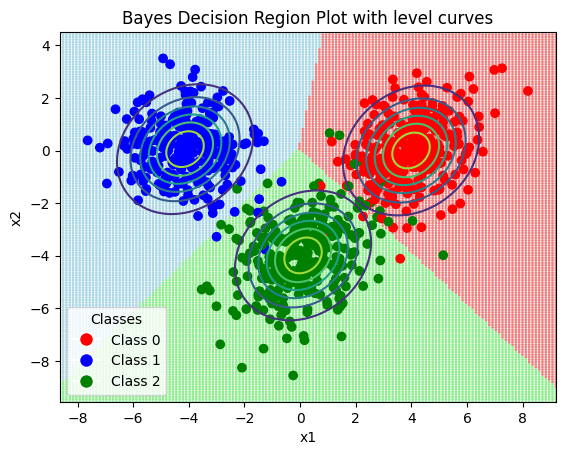

In [1790]:
allclass = list(set(target))
data_each_class = []
d = len(data[0])
for i in range(len(allclass)):
    data_curr_class = []
    for j in range(len(data)):
        if target[j] == i:
            data_curr_class.append(data[j])
    data_each_class.append(data_curr_class)
allmean = []
prob_class = []
for i in range(len(allclass)):
    allmean.append(mean(data_each_class[i]))
    prob_class.append(len(data_each_class[i])/len(data))
allcov = []
for i in range(len(allclass)):
    allcov.append(find_cov_mat(data_each_class[i],allmean[i]))
avg_all_cov=np.zeros((d,d))
for i in range(len(allcov)):
    avg_all_cov=avg_all_cov+allcov[i]

# print(avg_all_cov.shape)
for i in range(d):
    for j in range(d):
        avg_all_cov[i][j]  = avg_all_cov[i][j]/(len(allcov))
all_same_cov = [avg_all_cov]*(len(allcov))
# labelx = find_bayes_label([8.6457252406,-12.3994173272],allclass,data_each_class,allmean,prob_class,allcov)

actual = bayes(allclass,data_each_class,allmean,prob_class,allcov,data)
actual_valid = bayes(allclass,data_each_class,allmean,prob_class,allcov,data_valid)
actual_test = bayes(allclass,data_each_class,allmean,prob_class,allcov,data_test)
accu = accuracy(actual,target)
accu_valid = accuracy(actual_valid,target_valid)
accu_test = accuracy(actual_test,target_test)
print(f"accuracy is {accu} for training data for different covariance matrices")
print(f"accuracy is {accu_valid} for validation data for different covariance matrices")
print(f"accuracy is {accu_test} for test data for different covariance matrices")


dict = {'Distribution':["Different Covariance Matrix"],'Training Accuracy':[accu],'Validation Accuracy':[accu_valid],'Test Accuracy':[accu_test]}
df2 = pd.DataFrame(dict)
df2.to_csv('report.csv',  index=False)

conf_matrix_train = [[0 for _ in range(3)] for _ in range(3)]
for i in range(len(actual)):
    predlab = int(actual[i])
    conf_matrix_train[predlab][int(target[i])] = conf_matrix_train[predlab][int(target[i])]+1
    
conf_matrix_test = [[0 for _ in range(3)] for _ in range(3)]
for i in range(len(actual_test)):
    predlab = int(actual_test[i])
    conf_matrix_test[predlab][int(target_test[i])] = conf_matrix_test[predlab][int(target_test[i])]+1
    
    
labelname = ["Class 0","Class 1","Class 2"]
dict = {' ':labelname,'Class 0':[x[0] for x in conf_matrix_test],'Class 1':[x[1] for x in conf_matrix_test],'Class 2':[x[2] for x in conf_matrix_test]}
df2 = pd.DataFrame(dict)
df2.to_csv('report.csv', mode='a',  index=False)

dict = {' ':labelname,'Class 0':[x[0] for x in conf_matrix_train],'Class 1':[x[1] for x in conf_matrix_train],'Class 2':[x[2] for x in conf_matrix_train]}
df2 = pd.DataFrame(dict)
df2.to_csv('report.csv', mode='a',  index=False)


input1 = [x[0] for x in data]
input2 = [x[1] for x in data]

x_min, x_max = min(input1) - 1, max(input1) + 1
y_min, y_max = min(input2) - 1, max(input2) + 1
x_points = np.linspace(x_min, x_max, 150)
y_points = np.linspace(y_min, y_max, 150)

# Create the meshgrid
xx, yy = np.meshgrid(x_points, y_points)

# Flatten the mesh grid for easy iteration
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Predict class labels for each point in the mesh grid using your custom KNN function
Z = np.array([find_bayes_label([x,y],allclass,data_each_class,allmean,prob_class,allcov) for x, y in mesh_points])
Z = Z.reshape(xx.shape)

# Plotting the decision regions
cmap_light = ListedColormap(['lightcoral', 'lightblue','lightgreen'])  # Light colors for decision regions
cmap_bold = ListedColormap(['red', 'blue','green'])    # Bold colors for data points

plt.scatter(xx, yy, c=Z, cmap=cmap_light,s=1)  # Plot decision regions
# plt.contour(xx,yy,c=Z,levels = 6,alpha=1,cmap='viridis')
# Scatter plot for the original points
plt.scatter(input1, input2, c=target, cmap=cmap_bold)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Bayes Decision Region plot without level curves")
plt.xlabel("x1")
plt.ylabel("x2")
class_labels = ['Class 0', 'Class 1', 'Class 2']
class_colors = ['red', 'blue', 'green']

# Creating custom legend handles for each class
handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
        for label, color in zip(class_labels, class_colors)]

plt.legend(handles=handles, title="Classes")
plt.show()




xx, yy = np.meshgrid(x_points, y_points)

# Flatten the mesh grid for easy iteration
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Predict class labels for each point in the mesh grid using your custom KNN function


Z1 = np.array([find_normal([x,y], allmean[0], allcov[0]) for x, y in mesh_points])
Z2 = np.array([find_normal([x,y], allmean[1], allcov[1]) for x, y in mesh_points])
Z3 = np.array([find_normal([x,y], allmean[2], allcov[2]) for x, y in mesh_points])
Z3 = Z3.reshape(xx.shape)
Z2 = Z2.reshape(xx.shape)
Z1 = Z1.reshape(xx.shape)
Z = np.array([find_bayes_label([x,y],allclass,data_each_class,allmean,prob_class,allcov) for x, y in mesh_points])
Z = Z.reshape(xx.shape)
# Plotting the decision regions
cmap_light = ListedColormap(['lightcoral', 'lightblue','lightgreen'])  # Light colors for decision regions
cmap_bold = ListedColormap(['red', 'blue','green'])    # Bold colors for data points

plt.scatter(xx, yy, c=Z, cmap=cmap_light,s=1)  # Plot decision regions
plt.contour(xx,yy,Z1,levels=6,alpha=1, cmap='viridis')
plt.contour(xx,yy,Z2,levels=6,alpha=1, cmap='viridis')
plt.contour(xx,yy,Z3,levels=6,alpha=1, cmap='viridis')
# Scatter plot for the original points

plt.scatter(input1, input2, c=target, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Bayes Decision Region Plot with level curves")
plt.xlabel("x1")
plt.ylabel("x2")
class_labels = ['Class 0', 'Class 1', 'Class 2']
class_colors = ['red', 'blue', 'green']

# Creating custom legend handles for each class
handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
        for label, color in zip(class_labels, class_colors)]

plt.legend(handles=handles, title="Classes")
plt.show()




actual = bayes(allclass,data_each_class,allmean,prob_class,all_same_cov,data)
actual_valid = bayes(allclass,data_each_class,allmean,prob_class,all_same_cov,data_valid)
actual_test = bayes(allclass,data_each_class,allmean,prob_class,all_same_cov,data_test)
accu = accuracy(actual,target)
accu_valid = accuracy(actual_valid,target_valid)
accu_test = accuracy(actual_test,target_test)

print(f"accuracy is {accu} for training data for same covariance matrices")
print(f"accuracy is {accu_valid} for validation data for same covariance matrices")
print(f"accuracy is {accu_test} for test data for same covariance matrices")

dict = {'Distribution':["Same Covariance Matrix"],'Training Accuracy':[accu],'Validation Accuracy':[accu_valid],'Test Accuracy':[accu_test]}
df2 = pd.DataFrame(dict)
df2.to_csv('report.csv',mode = 'a',header = False,  index=False)

conf_matrix_train = [[0 for _ in range(3)] for _ in range(3)]
for i in range(len(actual)):
    predlab = int(actual[i])
    conf_matrix_train[predlab][int(target[i])] = conf_matrix_train[predlab][int(target[i])]+1
    
conf_matrix_test = [[0 for _ in range(3)] for _ in range(3)]
for i in range(len(actual_test)):
    predlab = int(actual_test[i])
    conf_matrix_test[predlab][int(target_test[i])] = conf_matrix_test[predlab][int(target_test[i])]+1
    
    
labelname = ["Class 0","Class 1","Class 2"]
dict = {' ':labelname,'Class 0':[x[0] for x in conf_matrix_test],'Class 1':[x[1] for x in conf_matrix_test],'Class 2':[x[2] for x in conf_matrix_test]}
df2 = pd.DataFrame(dict)
df2.to_csv('report.csv', mode='a',  index=False)

dict = {' ':labelname,'Class 0':[x[0] for x in conf_matrix_train],'Class 1':[x[1] for x in conf_matrix_train],'Class 2':[x[2] for x in conf_matrix_train]}
df2 = pd.DataFrame(dict)
df2.to_csv('report.csv', mode='a',  index=False)

x_min, x_max = min(input1) - 1, max(input1) + 1
y_min, y_max = min(input2) - 1, max(input2) + 1
x_points = np.linspace(x_min, x_max, 150)
y_points = np.linspace(y_min, y_max, 150)

# Create the meshgrid
xx, yy = np.meshgrid(x_points, y_points)

# Flatten the mesh grid for easy iteration
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Predict class labels for each point in the mesh grid using your custom KNN function
Z = np.array([find_bayes_label([x,y],allclass,data_each_class,allmean,prob_class,all_same_cov) for x, y in mesh_points])
Z = Z.reshape(xx.shape)

# Plotting the decision regions
cmap_light = ListedColormap(['lightcoral', 'lightblue','lightgreen'])  # Light colors for decision regions
cmap_bold = ListedColormap(['red', 'blue','green'])    # Bold colors for data points

plt.scatter(xx, yy, c=Z, cmap=cmap_light,s=1)  # Plot decision regions
# plt.contour(xx,yy,c=Z,levels = 6,alpha=1,cmap='viridis')
# Scatter plot for the original points
plt.scatter(input1, input2, c=target, cmap=cmap_bold)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Bayes Decision Region Plot without level curves")
plt.xlabel("x1")
plt.ylabel("x2")
class_labels = ['Class 0', 'Class 1', 'Class 2']
class_colors = ['red', 'blue', 'green']

# Creating custom legend handles for each class
handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
        for label, color in zip(class_labels, class_colors)]

plt.legend(handles=handles, title="Classes")
plt.show()



xx, yy = np.meshgrid(x_points, y_points)

# Flatten the mesh grid for easy iteration
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Predict class labels for each point in the mesh grid using your custom KNN function


Z1 = np.array([find_normal([x,y], allmean[0], avg_all_cov) for x, y in mesh_points])
Z2 = np.array([find_normal([x,y], allmean[1], avg_all_cov) for x, y in mesh_points])
Z3 = np.array([find_normal([x,y], allmean[2], avg_all_cov) for x, y in mesh_points])
Z3 = Z3.reshape(xx.shape)
Z2 = Z2.reshape(xx.shape)
Z1 = Z1.reshape(xx.shape)
Z = np.array([find_bayes_label([x,y],allclass,data_each_class,allmean,prob_class,all_same_cov) for x, y in mesh_points])
Z = Z.reshape(xx.shape)
# Plotting the decision regions
cmap_light = ListedColormap(['lightcoral', 'lightblue','lightgreen'])  # Light colors for decision regions
cmap_bold = ListedColormap(['red', 'blue','green'])    # Bold colors for data points

plt.scatter(xx, yy, c=Z, cmap=cmap_light,s=1)  # Plot decision regions
plt.contour(xx,yy,Z1,levels=6,alpha=1, cmap='viridis')
plt.contour(xx,yy,Z2,levels=6,alpha=1, cmap='viridis')
plt.contour(xx,yy,Z3,levels=6,alpha=1, cmap='viridis')
# Scatter plot for the original points

plt.scatter(input1, input2, c=target, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Bayes Decision Region Plot with level curves")
plt.xlabel("x1")
plt.ylabel("x2")
class_labels = ['Class 0', 'Class 1', 'Class 2']
class_colors = ['red', 'blue', 'green']

# Creating custom legend handles for each class
handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
        for label, color in zip(class_labels, class_colors)]

plt.legend(handles=handles, title="Classes")
plt.show()


In [1779]:
def find_cov_mat_naive(data,mymean):
    d = len(mymean)
    result = [[0 for _ in range(d)] for _ in range(d)]
    for i in range(d):
        for x in data:
            result[i][i]+=((x[i]-mymean[i])**2)
        result[i][i]/=(len(data))
    return result
    

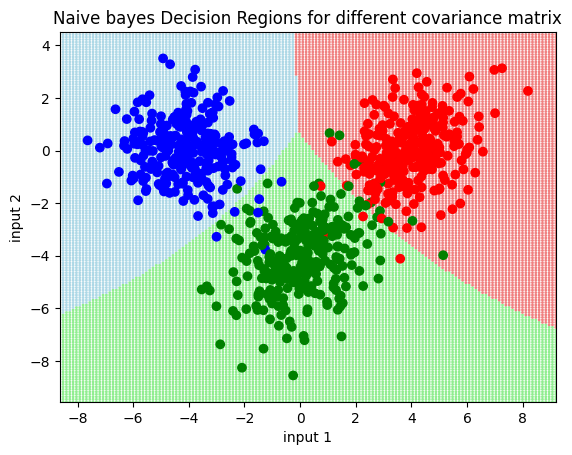

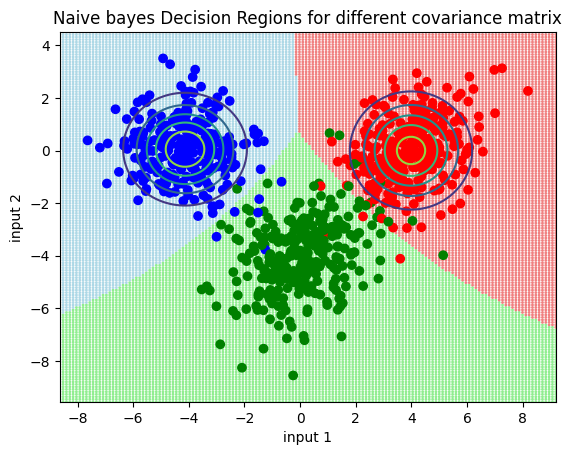

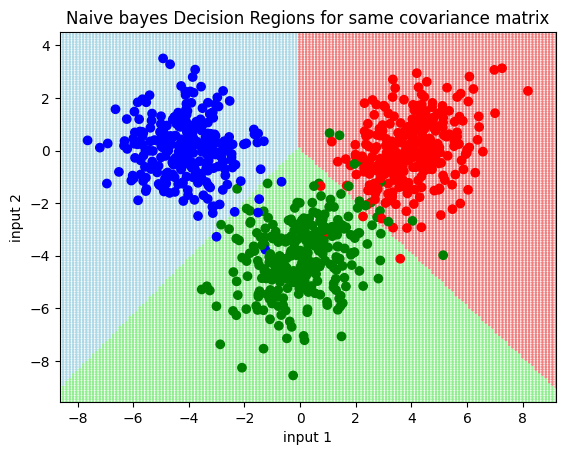

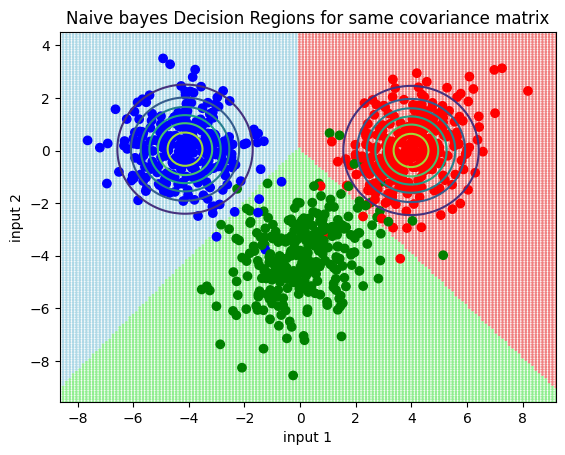

In [1784]:
allclass = list(set(target))
d = len(data[0])
data_each_class = []
for i in range(len(allclass)):
    data_curr_class = []
    for j in range(len(data)):
        if target[j] == i:
            data_curr_class.append(data[j])
    data_each_class.append(data_curr_class)
allmean = []
prob_class = []
for i in range(len(allclass)):
    allmean.append(mean(data_each_class[i]))
    prob_class.append(len(data_each_class[i])/len(data))
allcov = []
for i in range(len(allclass)):
    allcov.append(find_cov_mat_naive(data_each_class[i],allmean[i]))
avg_all_cov=np.zeros((d,d))
for i in range(len(allcov)):
    avg_all_cov=avg_all_cov+allcov[i]

# print(avg_all_cov.shape)
for i in range(d):
    for j in range(d):
        avg_all_cov[i][j]  = avg_all_cov[i][j]/(len(allcov))
all_same_cov = [avg_all_cov]*(len(allcov))

input1 = [x[0] for x in data]
input2 = [x[1] for x in data]

x_min, x_max = min(input1) -1, max(input1) + 1
y_min, y_max = min(input2) - 1, max(input2) + 1
x_points = np.linspace(x_min, x_max, 150)
y_points = np.linspace(y_min, y_max, 150)

# Create the meshgrid
xx, yy = np.meshgrid(x_points, y_points)

# Flatten the mesh grid for easy iteration
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Predict class labels for each point in the mesh grid using your custom KNN function
Z = np.array([find_bayes_label([x,y],allclass,data_each_class,allmean,prob_class,allcov) for x, y in mesh_points])
Z = Z.reshape(xx.shape)

# Plotting the decision regions
cmap_light = ListedColormap(['lightcoral', 'lightblue','lightgreen'])  # Light colors for decision regions
cmap_bold = ListedColormap(['red', 'blue','green'])    # Bold colors for data points

plt.scatter(xx, yy, c=Z, cmap=cmap_light,s=1)  # Plot decision regions

# Scatter plot for the original points
plt.scatter(input1, input2, c=target, cmap=cmap_bold)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naive bayes Decision Regions for different covariance matrix")
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.show()

xx, yy = np.meshgrid(x_points, y_points)

# Flatten the mesh grid for easy iteration
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z1 = np.array([find_normal([x,y], allmean[0], allcov[0]) for x, y in mesh_points])
Z2 = np.array([find_normal([x,y], allmean[1], allcov[1]) for x, y in mesh_points])
# Z3 = np.array([find_normal([x,y], allmean[2], allcov[2]) for x, y in mesh_points])
# Z3 = Z3.reshape(xx.shape)

Z2 = Z2.reshape(xx.shape)
Z1 = Z1.reshape(xx.shape)
# Predict class labels for each point in the mesh grid using your custom KNN function
Z = np.array([find_bayes_label([x,y],allclass,data_each_class,allmean,prob_class,allcov) for x, y in mesh_points])
Z = Z.reshape(xx.shape)

# Plotting the decision regions
cmap_light = ListedColormap(['lightcoral', 'lightblue','lightgreen'])  # Light colors for decision regions
cmap_bold = ListedColormap(['red', 'blue','green'])    # Bold colors for data points
plt.contour(xx, yy, Z1, levels=6, alpha=1, cmap='viridis')
plt.contour(xx, yy, Z2, levels=6, alpha=1, cmap='viridis')
# plt.contour(xx, yy, Z3, levels=6, alpha=1, cmap='viridis')
plt.scatter(xx, yy, c=Z, cmap=cmap_light,s=1)  # Plot decision regions

# Scatter plot for the original points
plt.scatter(input1, input2, c=target, cmap=cmap_bold)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naive bayes Decision Regions for different covariance matrix")
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.show()



x_min, x_max = min(input1) -1, max(input1) + 1
y_min, y_max = min(input2) - 1, max(input2) + 1
x_points = np.linspace(x_min, x_max, 150)
y_points = np.linspace(y_min, y_max, 150)

# Create the meshgrid
xx, yy = np.meshgrid(x_points, y_points)

# Flatten the mesh grid for easy iteration
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Predict class labels for each point in the mesh grid using your custom KNN function
Z = np.array([find_bayes_label([x,y],allclass,data_each_class,allmean,prob_class,all_same_cov) for x, y in mesh_points])
Z = Z.reshape(xx.shape)

# Plotting the decision regions
cmap_light = ListedColormap(['lightcoral', 'lightblue','lightgreen'])  # Light colors for decision regions
cmap_bold = ListedColormap(['red', 'blue','green'])    # Bold colors for data points

plt.scatter(xx, yy, c=Z, cmap=cmap_light,s=1)  # Plot decision regions

# Scatter plot for the original points
plt.scatter(input1, input2, c=target, cmap=cmap_bold)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naive bayes Decision Regions for same covariance matrix")
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.show()

xx, yy = np.meshgrid(x_points, y_points)

# Flatten the mesh grid for easy iteration
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z1 = np.array([find_normal([x,y], allmean[0], avg_all_cov) for x, y in mesh_points])
Z2 = np.array([find_normal([x,y], allmean[1], avg_all_cov) for x, y in mesh_points])
# Z3 = np.array([find_normal([x,y], allmean[2], avg_all_cov) for x, y in mesh_points])
# Z3 = Z3.reshape(xx.shape)

Z2 = Z2.reshape(xx.shape)
Z1 = Z1.reshape(xx.shape)
# Predict class labels for each point in the mesh grid using your custom KNN function
Z = np.array([find_bayes_label([x,y],allclass,data_each_class,allmean,prob_class,all_same_cov) for x, y in mesh_points])
Z = Z.reshape(xx.shape)

# Plotting the decision regions
cmap_light = ListedColormap(['lightcoral', 'lightblue','lightgreen'])  # Light colors for decision regions
cmap_bold = ListedColormap(['red', 'blue','green'])    # Bold colors for data points
plt.contour(xx, yy, Z1, levels=6, alpha=1, cmap='viridis')
plt.contour(xx, yy, Z2, levels=6, alpha=1, cmap='viridis')
# plt.contour(xx, yy, Z3, levels=6, alpha=1, cmap='viridis')
plt.scatter(xx, yy, c=Z, cmap=cmap_light,s=1)  # Plot decision regions

# Scatter plot for the original points
plt.scatter(input1, input2, c=target, cmap=cmap_bold)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naive bayes Decision Regions for same covariance matrix")
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.show()